In [2]:
import os
import pandas as pd

file_path = '../data/Percent_Change_in_Consumer_Spending.csv'

consumer_spending_data = pd.read_csv(file_path)

consumer_spending_data.info()
consumer_spending_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4905 entries, 0 to 4904
Data columns (total 11 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   State FIPS code                                                              4905 non-null   int64  
 1   Date                                                                         4905 non-null   object 
 2   All merchant category codes spending                                         4905 non-null   float64
 3   Accommodation and food service (ACF) spending                                4905 non-null   float64
 4   Arts, entertainment, and recreation (AER)  spending                          4905 non-null   float64
 5   General merchandise stores (GEN) and apparel and accessories (AAP) spending  4905 non-null   float64
 6   Grocery and food store (GRF)  spending  

,State FIPS code,Date,All merchant category codes spending,Accommodation and food service (ACF) spending,"Arts, entertainment, and recreation (AER) spending",General merchandise stores (GEN) and apparel and accessories (AAP) spending,Grocery and food store (GRF) spending,Health care and social assistance (HCS) spending,Transportation and warehousing (TWS) spending,"Retail spending, including grocery (AAP, CEC, GEN, GRF, HIC, ETC, SGH)","Retail spending, excluding grocery ((AAP, CEC, GEN, HIC, ETC, SGH)"
0,9,01/13/2020,-2.300,-6.04,-12.3,-5.390,-3.470,-3.17,-2.550,-3.570,-3.690
1,25,01/13/2020,-0.218,-2.40,-14.0,-2.260,0.375,3.63,-1.770,0.377,0.299
2,34,01/13/2020,-0.560,-3.86,-11.6,0.654,-0.622,4.77,1.230,0.227,1.090
3,36,01/13/2020,-0.381,-3.63,-13.9,-1.450,-0.891,7.92,-0.107,-0.561,-0.276
4,44,01/13/2020,-1.850,-15.00,-19.1,-5.960,-0.105,1.24,-31.200,-4.510,-9.520


In [3]:
# Convert 'Date' column to datetime format
consumer_spending_data['Date'] = pd.to_datetime(consumer_spending_data['Date'])

# Rename columns
consumer_spending_data.rename(columns={
    "All merchant category codes spending": "All_Spending",
    "Accommodation and food service (ACF) spending": "Accommodation_Food",
    "Arts, entertainment, and recreation (AER)  spending": "Arts_Entertainment",
    "General merchandise stores (GEN) and apparel and accessories (AAP) spending": "General_Apparel",
    "Grocery and food store (GRF)  spending": "Grocery",
    "Health care and social assistance (HCS) spending": "Health_Care",
    "Transportation and warehousing (TWS)  spending": "Transportation",
    "Retail spending, including grocery  (AAP, CEC, GEN, GRF, HIC, ETC, SGH)": "Retail_Including_Grocery",
    "Retail spending, excluding grocery ((AAP, CEC, GEN, HIC, ETC, SGH)": "Retail_Excluding_Grocery"
}, inplace=True)

consumer_spending_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4905 entries, 0 to 4904
Data columns (total 11 columns):
 #   Column                                                                    Non-Null Count  Dtype         
---  ------                                                                    --------------  -----         
 0   State FIPS code                                                           4905 non-null   int64         
 1   Date                                                                      4905 non-null   datetime64[ns]
 2   All_Spending                                                              4905 non-null   float64       
 3   Accommodation_Food                                                        4905 non-null   float64       
 4   Arts_Entertainment                                                        4905 non-null   float64       
 5   General_Apparel                                                           4905 non-null   float64       
 6   Grocery 

In [4]:
# Define key events
events = {
    'Lockdown Starts': '2020-03-15',
    'Reopening Begins': '2021-06-15',
    'Stimulus Checks': '2021-03-15'
}

# Convert event dates to datetime format
events = {key: pd.to_datetime(value) for key, value in events.items()}


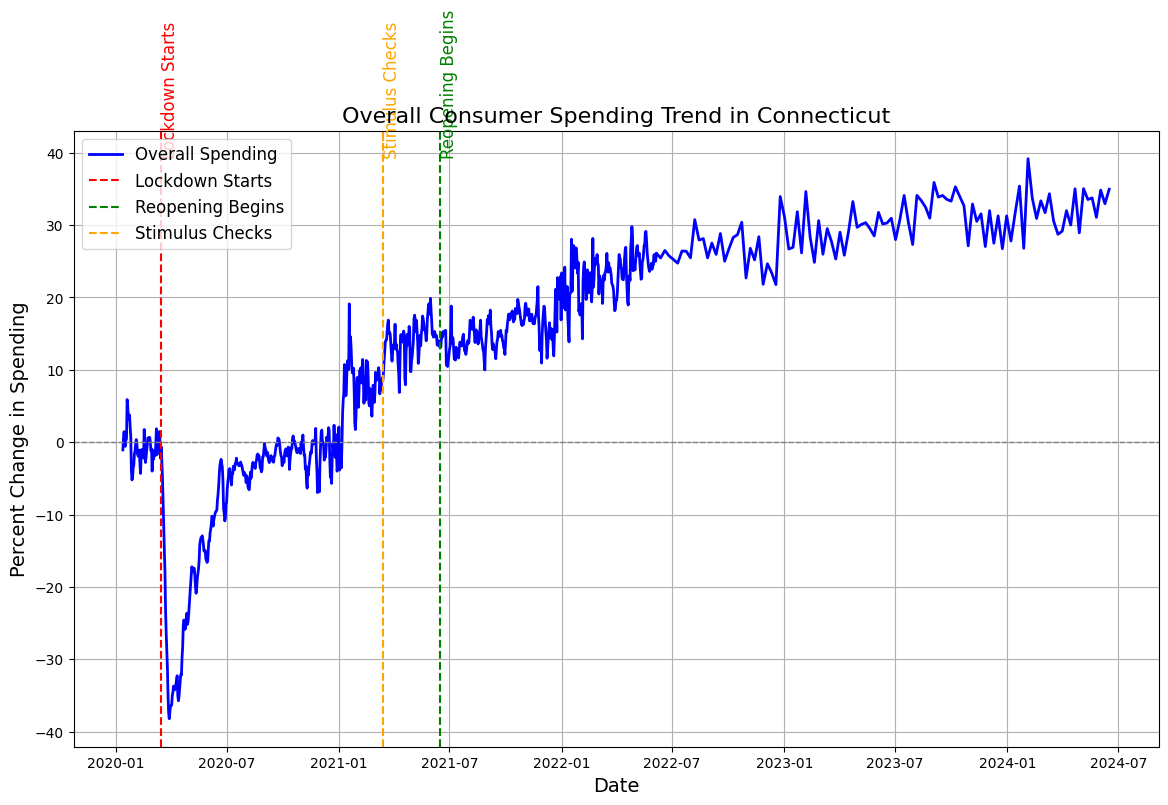

In [5]:
import matplotlib.pyplot as plt

# Group data by Date and calculate mean of All_Spending
overall_trend = consumer_spending_data.groupby('Date')['All_Spending'].mean()

# Define colors for each event
event_colors = {
    'Lockdown Starts': 'red',
    'Reopening Begins': 'green',
    'Stimulus Checks': 'orange'
}

# Plot overall spending trend
plt.figure(figsize=(14, 8))
plt.plot(overall_trend.index, overall_trend.values, label="Overall Spending", color='blue', linewidth=2)

# Add event annotations with different colors
for event, date in events.items():
    plt.axvline(date, color=event_colors[event], linestyle='--', linewidth=1.5, label=event)
    plt.text(date, overall_trend.max(), event, color=event_colors[event], fontsize=12, rotation=90, va='bottom')

# Add plot details
plt.title("Overall Consumer Spending Trend in Connecticut", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Percent Change in Spending", fontsize=14)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)  # Baseline
plt.legend(fontsize=12, loc='upper left')
plt.grid(True)
plt.show()

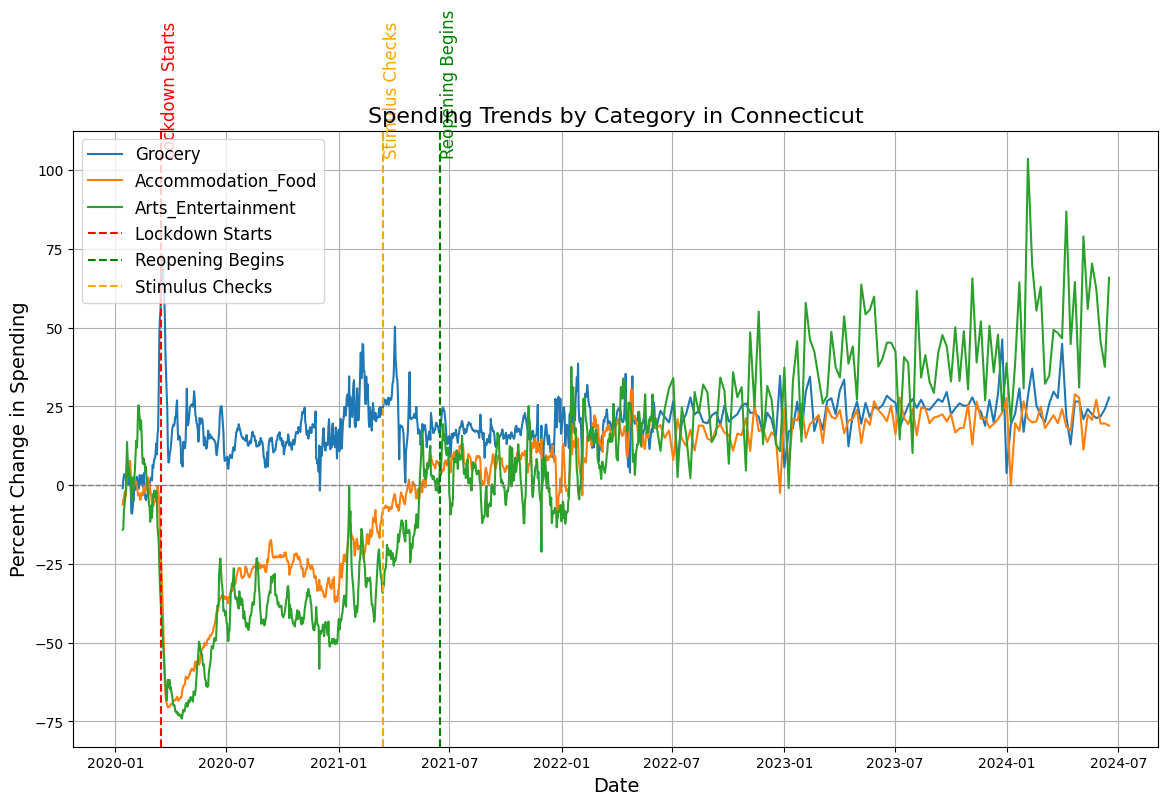

In [6]:
# Define key categories
categories = ['Grocery', 'Accommodation_Food', 'Arts_Entertainment']

# Group data by Date and calculate mean for selected categories
category_trends = consumer_spending_data.groupby('Date')[categories].mean()

# Plot spending trends for selected categories
plt.figure(figsize=(14, 8))
for category in categories:
    plt.plot(category_trends.index, category_trends[category], label=category)

# Add lockdown, reopening, and stimulus annotations with unique colors
for event, date in events.items():
    plt.axvline(date, color=event_colors[event], linestyle='--', linewidth=1.5, label=event)
    plt.text(date, category_trends.max().max(), event, color=event_colors[event], fontsize=12, rotation=90, va='bottom')

# Add plot details
plt.title("Spending Trends by Category in Connecticut", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Percent Change in Spending", fontsize=14)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)  # Baseline
plt.legend(fontsize=12, loc='upper left')
plt.grid(True)
plt.show()

In [7]:
# Define time periods
lockdown_period = category_trends.loc['2020-03-15':'2021-06-15']
post_reopening = category_trends.loc['2021-06-16':]

# Calculate averages
print("Lockdown period average changes:")
print(lockdown_period.mean())

print("\nPost-reopening average changes:")
print(post_reopening.mean())

Lockdown period average changes:
Grocery               18.949737
Accommodation_Food   -26.932108
Arts_Entertainment   -36.795250
dtype: float64

Post-reopening average changes:
Grocery               19.330360
Accommodation_Food    12.447565
Arts_Entertainment    14.674093
dtype: float64


Pre-Pandemic average changes:
Grocery              -0.005016
Accommodation_Food   -0.383084
Arts_Entertainment    4.086607
dtype: float64


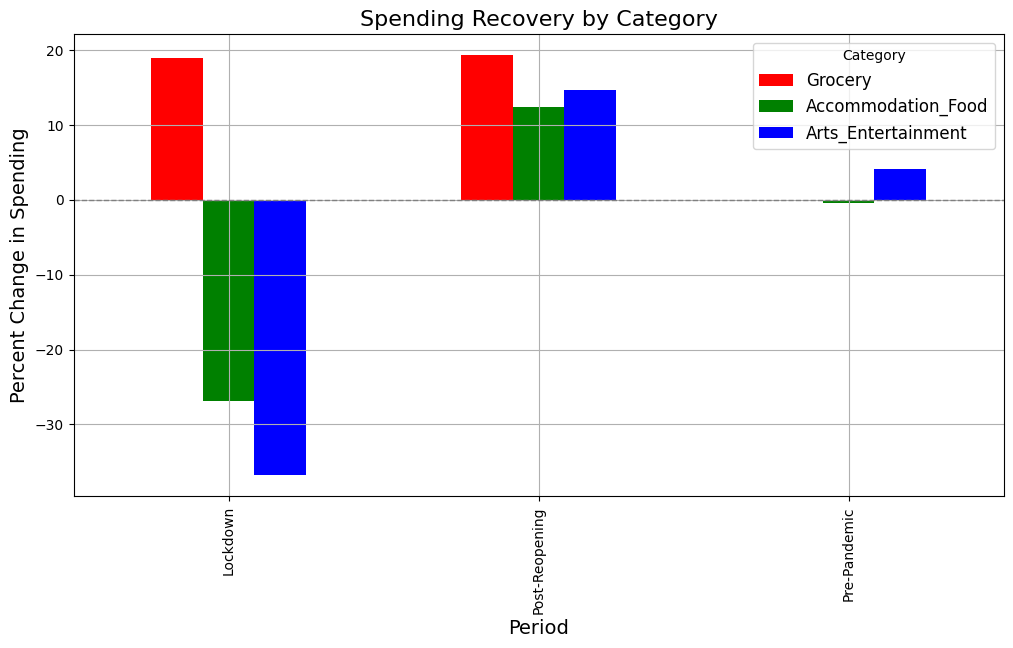

In [8]:
# Calculate pre-pandemic averages
pre_pandemic = category_trends.loc[:'2020-02-29'].mean()
print("Pre-Pandemic average changes:")
print(pre_pandemic)

# Compare recovery by period
recovery_data = pd.DataFrame({
    "Lockdown": lockdown_period.mean(),
    "Post-Reopening": post_reopening.mean(),
    "Pre-Pandemic": pre_pandemic
})

# Plot recovery comparison
recovery_data.T.plot(kind="bar", figsize=(12, 6), color=['red', 'green', 'blue'])
plt.title("Spending Recovery by Category", fontsize=16)
plt.ylabel("Percent Change in Spending", fontsize=14)
plt.xlabel("Period", fontsize=14)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.legend(title="Category", fontsize=12)
plt.grid(True)
plt.show()

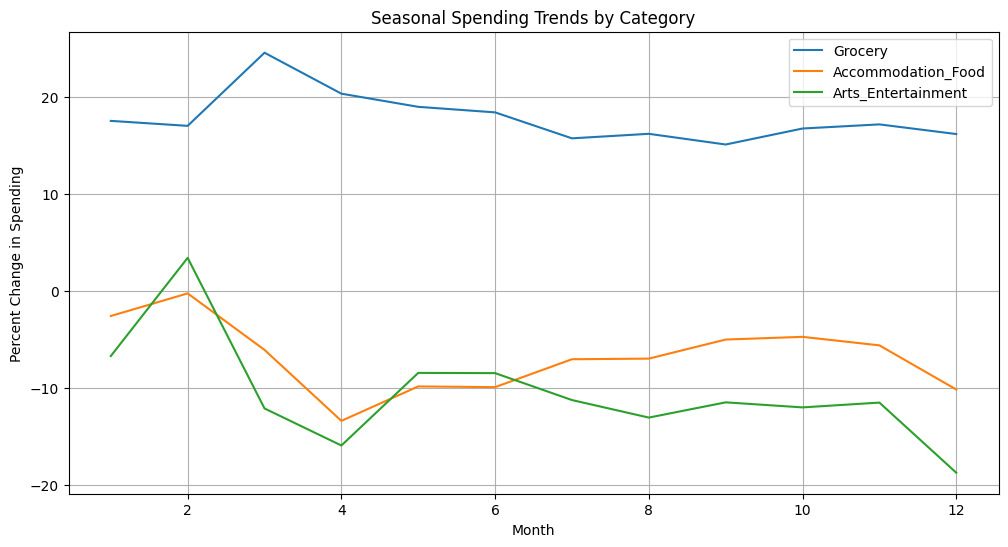

In [9]:
# Add a Month column
consumer_spending_data['Month'] = consumer_spending_data['Date'].dt.month

# Group by Month and calculate averages
monthly_trends = consumer_spending_data.groupby('Month').mean()

# Plot monthly trends for key categories
monthly_trends[['Grocery', 'Accommodation_Food', 'Arts_Entertainment']].plot(kind='line', figsize=(12, 6))
plt.title("Seasonal Spending Trends by Category")
plt.xlabel("Month")
plt.ylabel("Percent Change in Spending")
plt.grid(True)
plt.show()